# Finding the optimal value of K empirically in KNN model. Showing the results using a plot with training and test errors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
Main_df = pd.read_csv("C:/Users/DELL/Downloads/ML/Distance_Matrix.csv",index_col="Unnamed: 0") #store the csv file in Main_df


In [2]:
from collections import OrderedDict
from sklearn.metrics import accuracy_score
s_df=Main_df                                               #create a copy of the original dataset

In [3]:
s_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
X1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
X2,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X3,1.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X4,1.6,1.4,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X5,1.7,1.4,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X6,1.3,1.4,1.4,1.5,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X7,1.6,1.3,1.4,1.4,1.5,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X8,1.5,1.4,1.6,1.3,1.7,1.6,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X9,1.4,1.3,1.4,1.5,1.2,1.4,1.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X10,2.3,2.4,2.5,2.3,2.6,2.7,2.8,2.7,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
s_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
X1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
X2,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X3,1.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X4,1.6,1.4,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
X5,1.7,1.4,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
s_df.value_counts()

X1   X2   X3   X4   X5   X6   X7   X8   X9   X10  X11  X12  X13  X14  X15  X16  X17  X18  X19
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0      1
6.0  6.1  6.2  5.8  6.1  6.0  6.1  5.9  5.8  6.0  3.0  2.9  2.7  2.4  2.5  2.8  3.1  0.4  0      1
dtype: int64

In [6]:
s_df.columns                                                                        #checking the datatype of index

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19'],
      dtype='object')

In [7]:
s_df.index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]      #changing the datatype for iterating 
s_df.columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]    #changing the datatype for iterating

In [8]:
s_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1.6,1.4,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1.7,1.4,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1.3,1.4,1.4,1.5,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1.6,1.3,1.4,1.4,1.5,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1.5,1.4,1.6,1.3,1.7,1.6,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,1.4,1.3,1.4,1.5,1.2,1.4,1.3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10,2.3,2.4,2.5,2.3,2.6,2.7,2.8,2.7,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
s_df.columns                                                                             #datatype changed to int

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')

In [10]:
s_df.index                                                                               #datatype changed to int

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')

In [11]:
import warnings
warnings.filterwarnings('ignore')


## CONVERTING THE LOWER TRIANGULAR MATRIX BY REPLICATING THE DISTANCES

In [12]:
for i in range(2,20):
    j=i-1
    while(j>0):
        s_df[i][j]=s_df[j][i]
        j=j-1
s_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.0,1.5,1.4,1.6,1.7,1.3,1.6,1.5,1.4,2.3,2.9,3.2,3.3,3.4,4.2,4.1,5.9,6.1,6.0
2,1.5,NaN,1.6,1.4,1.4,1.4,1.3,1.4,1.3,2.4,2.8,3.3,3.4,3.2,4.1,4.1,6.2,6.3,6.1
3,1.4,1.6,NaN,1.3,1.5,1.4,1.4,1.6,1.4,2.5,2.9,3.2,3.2,3.5,4.1,4.1,6.2,6.2,6.2
4,1.6,1.4,1.3,NaN,1.5,1.5,1.4,1.3,1.5,2.3,3.0,3.1,3.2,3.4,4.1,4.1,5.8,5.8,5.8
5,1.7,1.4,1.5,1.5,NaN,1.4,1.5,1.7,1.2,2.6,2.9,3.3,3.3,3.7,4.1,4.1,6.1,6.1,6.1
6,1.3,1.4,1.4,1.5,1.4,NaN,1.8,1.6,1.4,2.7,3.1,3.4,3.4,3.5,4.1,4.1,6.0,6.0,6.0
7,1.6,1.3,1.4,1.4,1.5,1.8,NaN,1.4,1.3,2.8,2.9,3.3,3.2,3.6,4.1,4.1,6.1,6.1,6.1
8,1.5,1.4,1.6,1.3,1.7,1.6,1.4,NaN,1.5,2.7,3.1,3.4,3.3,3.3,4.1,4.1,5.9,5.9,5.9
9,1.4,1.3,1.4,1.5,1.2,1.4,1.3,1.5,NaN,3.1,3.0,3.5,3.5,3.5,4.1,4.1,5.8,5.8,5.8
10,2.3,2.4,2.5,2.3,2.6,2.7,2.8,2.7,3.1,NaN,1.5,3.3,3.6,3.6,4.1,4.1,6.0,6.0,6.0


## IN A TRANSPOSE MATRIX DIAGONAL ELEMENTS ARE ALWAYS ZERO

In [13]:
for i in range(1,19):
    s_df[i][i]=0.0
s_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.0,1.5,1.4,1.6,1.7,1.3,1.6,1.5,1.4,2.3,2.9,3.2,3.3,3.4,4.2,4.1,5.9,6.1,6.0
2,1.5,0.0,1.6,1.4,1.4,1.4,1.3,1.4,1.3,2.4,2.8,3.3,3.4,3.2,4.1,4.1,6.2,6.3,6.1
3,1.4,1.6,0.0,1.3,1.5,1.4,1.4,1.6,1.4,2.5,2.9,3.2,3.2,3.5,4.1,4.1,6.2,6.2,6.2
4,1.6,1.4,1.3,0.0,1.5,1.5,1.4,1.3,1.5,2.3,3.0,3.1,3.2,3.4,4.1,4.1,5.8,5.8,5.8
5,1.7,1.4,1.5,1.5,0.0,1.4,1.5,1.7,1.2,2.6,2.9,3.3,3.3,3.7,4.1,4.1,6.1,6.1,6.1
6,1.3,1.4,1.4,1.5,1.4,0.0,1.8,1.6,1.4,2.7,3.1,3.4,3.4,3.5,4.1,4.1,6.0,6.0,6.0
7,1.6,1.3,1.4,1.4,1.5,1.8,0.0,1.4,1.3,2.8,2.9,3.3,3.2,3.6,4.1,4.1,6.1,6.1,6.1
8,1.5,1.4,1.6,1.3,1.7,1.6,1.4,0.0,1.5,2.7,3.1,3.4,3.3,3.3,4.1,4.1,5.9,5.9,5.9
9,1.4,1.3,1.4,1.5,1.2,1.4,1.3,1.5,0.0,3.1,3.0,3.5,3.5,3.5,4.1,4.1,5.8,5.8,5.8
10,2.3,2.4,2.5,2.3,2.6,2.7,2.8,2.7,3.1,0.0,1.5,3.3,3.6,3.6,4.1,4.1,6.0,6.0,6.0


## CHANGING THE COLUMNS AND INDEX LABELS 

In [14]:
s_df.index=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19']
s_df.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19']

In [15]:
s_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
X1,0.0,1.5,1.4,1.6,1.7,1.3,1.6,1.5,1.4,2.3,2.9,3.2,3.3,3.4,4.2,4.1,5.9,6.1,6.0
X2,1.5,0.0,1.6,1.4,1.4,1.4,1.3,1.4,1.3,2.4,2.8,3.3,3.4,3.2,4.1,4.1,6.2,6.3,6.1
X3,1.4,1.6,0.0,1.3,1.5,1.4,1.4,1.6,1.4,2.5,2.9,3.2,3.2,3.5,4.1,4.1,6.2,6.2,6.2
X4,1.6,1.4,1.3,0.0,1.5,1.5,1.4,1.3,1.5,2.3,3.0,3.1,3.2,3.4,4.1,4.1,5.8,5.8,5.8
X5,1.7,1.4,1.5,1.5,0.0,1.4,1.5,1.7,1.2,2.6,2.9,3.3,3.3,3.7,4.1,4.1,6.1,6.1,6.1


In [16]:
s_df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
X15,4.2,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,1.7,1.6,0.3,0.5,0.0,0.4,2.4,2.5,2.5
X16,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,4.1,1.6,1.5,0.4,0.5,0.4,0.0,2.5,2.6,2.8
X17,5.9,6.2,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,2.3,2.3,2.5,2.3,2.4,2.5,0.0,3.0,3.1
X18,6.1,6.3,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,3.1,2.7,2.6,2.3,2.5,2.6,3.0,0.0,0.4
X19,6.0,6.1,6.2,5.8,6.1,6.0,6.1,5.9,5.8,6.0,3.0,2.9,2.7,2.4,2.5,2.8,3.1,0.4,0.0


## FINDING OPTIMUM VALUE OF K FOR KNN MODEL

In [17]:
Tot_training_samples= ['X1','X5','X9','X13','X17','X3','X7','X11','X15','X19']   #from the given data in BOX 1
Tot_testing_samples= ['X2','X6','X10','X14','X18','X4','X8','X12','X16']         #from the given data in BOX 1

In [18]:
class1_training_samples=['X1','X5','X9','X13','X17']                             #from the given data in BOX 1
class2_training_samples=['X3','X7','X11','X15','X19']                            #from the given data in BOX 1

In [19]:
class1_testing_samples=['X2','X6','X10','X14','X18']                             #from the given data in BOX 1
class2_testing_samples=['X4','X8','X12','X16']                                   #from the given data in BOX 1

In [24]:
training_errors = []                                                             #create label for training errors
K = [1,2,3,4,5,6,7,8,9,10]
for k in K:
    original_Classes = []                                                        #original classes
    predicted_Classes = [] 
    for m in Tot_training_samples:
        class1_votes = 0
        class2_votes = 0
        distances = dict()
        for n in Tot_training_samples:
            distances[n] = s_df[n][m]
        sort_Alpha_Oder = OrderedDict(sorted(distances.items())) 
        sorted_samples = sorted(sort_Alpha_Oder.items(), key=lambda x: x[1])
        for a,b in sorted_samples[:k]:
            if a in class1_training_samples:
                class1_votes = class1_votes+1
            else:
                class2_votes = class2_votes+1
        
        final_label_pred = "class2"
        if class1_votes > class2_votes:
            final_label_pred = "class1"
            
        final_label_actual = "class2"
        if m in class1_training_samples:
            final_label_actual = "class1"
        
        original_Classes.append(final_label_actual)
        predicted_Classes.append(final_label_pred)
        
    training_error = 1 - accuracy_score(original_Classes,predicted_Classes)
    training_errors.append(training_error)
    
print("The TRAINING ERROR RATES for k=1,2,3,4,5,6,7,8,9,10 are", training_errors)

The TRAINING ERROR RATES for k=1,2,3,4,5,6,7,8,9,10 are [0.0, 0.30000000000000004, 0.19999999999999996, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.5]


In [25]:
testing_errors = []                                                                #create label for testing errors
K = [1,2,3,4,5,6,7,8,9,10]
for k in K:
    original_Classes = []                                                                        #original classes
    predicted_Classes = []                                                                       
    for m in Tot_testing_samples:
        class1_votes = 0
        class2_votes = 0
        distances = dict()
        for n in Tot_training_samples:
            distances[n] = s_df[n][m]
        sort_Alpha_Oder = OrderedDict(sorted(distances.items())) 
        sorted_samples = sorted(sort_Alpha_Oder.items(), key=lambda x: x[1])
        for a,b in sorted_samples[:k]:
            if a in class1_training_samples:
                class1_votes = class1_votes+1
            else:
                class2_votes = class2_votes+1
        
        final_label_pred = "class2"
        if class1_votes > class2_votes:
            final_label_pred = "class1"
            
        final_label_actual = "class2"
        if m in class1_testing_samples:
            final_label_actual = "class1"
        
        original_Classes.append(final_label_actual)
        predicted_Classes.append(final_label_pred)
        
    testing_error = 1 - accuracy_score(original_Classes,predicted_Classes)
    testing_errors.append(testing_error)
    
print("The TESTING ERROR RATES for k=1,2,3,4,5,6,7,8,9,10 are", testing_errors)

The TESTING ERROR RATES for k=1,2,3,4,5,6,7,8,9,10 are [0.4444444444444444, 0.5555555555555556, 0.4444444444444444, 0.33333333333333337, 0.5555555555555556, 0.5555555555555556, 0.33333333333333337, 0.4444444444444444, 0.4444444444444444, 0.5555555555555556]


## PLOTTING WITH TRAINING AND TESTING ERRORS

Text(0.5, 0, 'Values of K')

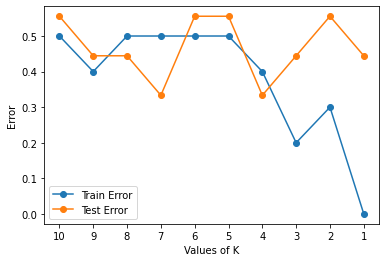

In [26]:
plt.plot(range(1,11),training_errors[::-1],label='Train Error',marker='o')
plt.plot(range(1,11),testing_errors[::-1],label='Test Error',marker='o')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10],labels=['10','9','8','7','6','5','4','3','2','1'])
plt.legend()
plt.ylabel('Error')
plt.xlabel("Values of K")